In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',1000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the train and test dataset

df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv('fraudTest.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Exploratory Data Analysis

In [4]:
print(df_train.shape)
print(df_test.shape)

(1296675, 23)
(555719, 23)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [7]:
# Dropping Unnamed column

df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
# Converting date columns to datetime format

df_train['trans_date_trans_time']=pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_date']=df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train['trans_date']=pd.to_datetime(df_train['trans_date'])
df_train['dob']=pd.to_datetime(df_train['dob'])

df_test['trans_date_trans_time']=pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_date']=df_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test['trans_date']=pd.to_datetime(df_test['trans_date'])
df_test['dob']=pd.to_datetime(df_test['dob'])

df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [11]:
# Dropping fields not necessary for model building

drop_cols = ['cc_num','merchant','first','last','street','zip','trans_num','unix_time']

df_train1 = df_train.drop(drop_cols,axis=1)
df_test1 = df_test.drop(drop_cols,axis=1)

df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

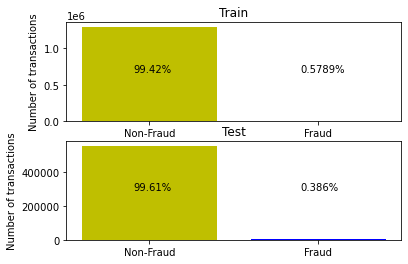

In [12]:
# Checking Class Imbalance

classes_train=df_train1['is_fraud'].value_counts()
normal_share_train=classes_train[0]/df_train1['is_fraud'].count()*100
fraud_share_train=classes_train[1]/df_train1['is_fraud'].count()*100

classes_test=df_test1['is_fraud'].value_counts()
normal_share_test=classes_test[0]/df_test1['is_fraud'].count()*100
fraud_share_test=classes_test[1]/df_test1['is_fraud'].count()*100

plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['y','b'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')

plt.subplot(2,1,2)
plt.bar(['Non-Fraud','Fraud'], classes_test, color=['y','b'])
plt.title('Test')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_test),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_test),(0.7, 0.5), xycoords='axes fraction')

plt.show()

In [13]:
# Creating field for age on transaction date

df_train1['age_at_trans'] = df_train1['trans_date'] - df_train1['dob']
df_train1['age_at_trans'] = df_train1['age_at_trans'].astype('timedelta64[Y]')

df_test1['age_at_trans'] = df_test1['trans_date'] - df_test1['dob']
df_test1['age_at_trans'] = df_test1['age_at_trans'].astype('timedelta64[Y]')

df_train1.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age_at_trans
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0


In [14]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [15]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [16]:
fraud_city = pd.DataFrame(df_train1.groupby('city')['is_fraud'].sum())
fraud_city = fraud_city[fraud_city['is_fraud']>0]
fraud_city.index

Index(['Achille', 'Acworth', 'Afton', 'Albany', 'Albuquerque', 'Alder',
       'Aledo', 'Alexandria', 'Allenhurst', 'Allentown',
       ...
       'Wilmington', 'Winfield', 'Winger', 'Winnsboro', 'Winslow', 'Winter',
       'Winthrop', 'Wittenberg', 'Yellowstone National Park', 'Zaleski'],
      dtype='object', name='city', length=702)

In [17]:
fraud_state = pd.DataFrame(df_train1.groupby('state')['is_fraud'].sum())
fraud_state = fraud_state[fraud_state['is_fraud']>0]
fraud_state.index
     

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [18]:
fraud_job = pd.DataFrame(df_train1.groupby('job')['is_fraud'].sum())
fraud_job = fraud_job[fraud_job['is_fraud']>0]
fraud_job.index

Index(['Academic librarian', 'Accountant, chartered',
       'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician',
       'Acupuncturist', 'Administrator', 'Administrator, arts',
       'Administrator, charities/voluntary organisations',
       'Administrator, education',
       ...
       'Veterinary surgeon', 'Video editor', 'Volunteer coordinator',
       'Warden/ranger', 'Warehouse manager', 'Waste management officer',
       'Water quality scientist', 'Web designer', 'Wellsite geologist',
       'Writer'],
      dtype='object', name='job', length=443)

In [19]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude

df_train1['lat_dist'] = abs(round(df_train1['merch_lat']-df_train1['lat'],3))
df_train1['long_dist'] = abs(round(df_train1['merch_long']-df_train1['long'],3))

df_test1['lat_dist'] = abs(round(df_test1['merch_lat']-df_test1['lat'],3))
df_test1['long_dist'] = abs(round(df_test1['merch_long']-df_test1['long'],3))

df_train1[['merch_lat','lat','lat_dist','merch_long','long','long_dist']].head()

,merch_lat,lat,lat_dist,merch_long,long,long_dist
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


In [20]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [21]:
# Creating month column

df_train1['trans_month'] = pd.DatetimeIndex(df_train1['trans_date']).month
df_test1['trans_month'] = pd.DatetimeIndex(df_test1['trans_date']).month

df_train1[['trans_date_trans_time','trans_month']].head()

,trans_date_trans_time,trans_month
0,2019-01-01 00:00:18,1
1,2019-01-01 00:00:44,1
2,2019-01-01 00:00:51,1
3,2019-01-01 00:01:16,1
4,2019-01-01 00:03:06,1


In [22]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [23]:
df_train1.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
age_at_trans                  83
lat_dist                    1001
long_dist                   1001
trans_month                   12
dtype: int64

In [24]:
df_test1.nunique()

trans_date_trans_time    544760
category                     14
amt                       37256
gender                        2
city                        849
state                        50
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
merch_lat                546490
merch_long               551770
is_fraud                      2
trans_date                  194
age_at_trans                 82
lat_dist                   1001
long_dist                  1001
trans_month                   7
dtype: int64

Checking if there are any highly skewed categorical variables

In [26]:
round(df_train1['category'].value_counts()/len(df_train1.index)*100,2)

gas_transport     10.15
grocery_pos        9.54
home               9.49
shopping_pos       9.00
kids_pets          8.72
shopping_net       7.52
entertainment      7.25
food_dining        7.05
personal_care      7.00
health_fitness     6.62
misc_pos           6.14
misc_net           4.88
grocery_net        3.51
travel             3.12
Name: category, dtype: float64

In [27]:
round(df_train1['gender'].value_counts()/len(df_train1.index)*100,2)

F    54.74
M    45.26
Name: gender, dtype: float64

In [28]:
round(df_train1['city'].value_counts()/len(df_train1.index)*100,2)

Birmingham                   0.43
San Antonio                  0.40
Utica                        0.39
Phoenix                      0.39
Meridian                     0.39
Thomas                       0.36
Conway                       0.36
Cleveland                    0.36
Warren                       0.35
Houston                      0.32
Burbank                      0.32
Naples                       0.32
Arcadia                      0.32
Indianapolis                 0.31
Brandon                      0.31
Fulton                       0.31
Lahoma                       0.28
Allentown                    0.28
Lakeland                     0.28
Dallas                       0.28
Washington                   0.28
Andrews                      0.28
Detroit                      0.28
Huntsville                   0.27
Hudson                       0.27
Orient                       0.27
Fort Washakie                0.27
Philadelphia                 0.27
Uledi                        0.24
Elberta       

In [29]:
round(df_train1['state'].value_counts()/len(df_train1.index)*100,2)

TX    7.32
NY    6.44
PA    6.16
CA    4.35
OH    3.58
MI    3.56
IL    3.34
FL    3.29
AL    3.16
MO    2.96
MN    2.45
AR    2.40
NC    2.33
WI    2.26
VA    2.26
SC    2.25
KY    2.20
IN    2.13
IA    2.08
OK    2.06
MD    2.02
GA    2.01
WV    1.98
NJ    1.90
NE    1.86
KS    1.77
MS    1.63
LA    1.62
WY    1.49
WA    1.46
OR    1.43
TN    1.35
ME    1.27
NM    1.27
ND    1.14
CO    1.07
MA    0.95
SD    0.95
VT    0.91
MT    0.91
AZ    0.83
UT    0.83
NH    0.64
CT    0.59
NV    0.43
ID    0.43
DC    0.28
HI    0.20
AK    0.16
RI    0.04
DE    0.00
Name: state, dtype: float64

In [30]:
round(df_train1['job'].value_counts()/len(df_train1.index)*100,2)

Film/video editor                                              0.75
Exhibition designer                                            0.71
Naval architect                                                0.67
Surveyor, land/geomatics                                       0.67
Materials engineer                                             0.64
Designer, ceramics/pottery                                     0.63
Systems developer                                              0.59
IT trainer                                                     0.59
Financial adviser                                              0.59
Environmental consultant                                       0.58
Chartered public finance accountant                            0.56
Scientist, audiological                                        0.55
Chief Executive Officer                                        0.55
Copywriter, advertising                                        0.55
Comptroller                                     

In [31]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [32]:
df_train1.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
age_at_trans                  83
lat_dist                    1001
long_dist                   1001
trans_month                   12
dtype: int64

In [33]:
# Dropping variables not useful for model building

drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date']

df_train2 = df_train1.drop(drop_cols,axis=1)
df_test2 = df_test1.drop(drop_cols,axis=1)

df_train2.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,misc_net,4.97,F,NC,3495,0,30.0,0.068,0.870,1
1,grocery_pos,107.23,F,WA,149,0,40.0,0.271,0.024,1
2,entertainment,220.11,M,ID,4154,0,56.0,0.970,0.108,1
3,gas_transport,45.00,M,MT,1939,0,51.0,0.804,0.447,1
4,misc_pos,41.96,M,VA,99,0,32.0,0.254,0.830,1


In [34]:
#Binary mapping on Gender
  
df_train2['gender'] = df_train2['gender'].map({'M': 1, 'F': 0})
df_test2['gender'] = df_test2['gender'].map({'M': 1, 'F': 0})

df_train2.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,misc_net,4.97,0,NC,3495,0,30.0,0.068,0.870,1
1,grocery_pos,107.23,0,WA,149,0,40.0,0.271,0.024,1
2,entertainment,220.11,1,ID,4154,0,56.0,0.970,0.108,1
3,gas_transport,45.00,1,MT,1939,0,51.0,0.804,0.447,1
4,misc_pos,41.96,1,VA,99,0,32.0,0.254,0.830,1


In [35]:
df_train2[['amt','city_pop','age_at_trans','lat_dist','long_dist']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age_at_trans,lat_dist,long_dist
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,4.549592e+01,5.002626e-01,5.003366e-01
std,1.603160e+02,3.019564e+05,1.739739e+01,2.885700e-01,2.888704e-01
min,1.000000e+00,2.300000e+01,1.300000e+01,0.000000e+00,0.000000e+00
25%,9.650000e+00,7.430000e+02,3.200000e+01,2.500000e-01,2.500000e-01
50%,4.752000e+01,2.456000e+03,4.300000e+01,5.010000e-01,5.000000e-01
75%,8.314000e+01,2.032800e+04,5.700000e+01,7.500000e-01,7.510000e-01
90%,1.366700e+02,1.861400e+05,7.000000e+01,9.000000e-01,9.000000e-01
95%,1.963100e+02,5.257130e+05,7.900000e+01,9.500000e-01,9.500000e-01
99%,5.459926e+02,1.577385e+06,9.100000e+01,9.900000e-01,9.900000e-01


In [36]:
# Creating dummy variables for Category

df_train3 = pd.get_dummies(df_train2,columns=['category'],drop_first=True)
df_test3 = pd.get_dummies(df_test2,columns=['category'],drop_first=True)

df_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   state                    1296675 non-null  object 
 3   city_pop                 1296675 non-null  int64  
 4   is_fraud                 1296675 non-null  int64  
 5   age_at_trans             1296675 non-null  float64
 6   lat_dist                 1296675 non-null  float64
 7   long_dist                1296675 non-null  float64
 8   trans_month              1296675 non-null  int64  
 9   category_food_dining     1296675 non-null  uint8  
 10  category_gas_transport   1296675 non-null  uint8  
 11  category_grocery_net     1296675 non-null  uint8  
 12  category_grocery_pos     1296675 non-null  uint8  
 13  category_health_fitness  1296675 non-null 

Building Model

In [38]:
# Dropping State

df_train4 = df_train3.drop('state',axis=1)
df_test4 = df_test3.drop('state',axis=1)
df_train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age_at_trans             1296675 non-null  float64
 5   lat_dist                 1296675 non-null  float64
 6   long_dist                1296675 non-null  float64
 7   trans_month              1296675 non-null  int64  
 8   category_food_dining     1296675 non-null  uint8  
 9   category_gas_transport   1296675 non-null  uint8  
 10  category_grocery_net     1296675 non-null  uint8  
 11  category_grocery_pos     1296675 non-null  uint8  
 12  category_health_fitness  1296675 non-null  uint8  
 13  category_home            1296675 non-null 

In [39]:
# Splitting train and test dataset into X and y

X_train = df_train4.drop(['is_fraud'],axis=1)
y_train = df_train4['is_fraud']

X_test = df_test4.drop(['is_fraud'],axis=1)
y_test = df_test4['is_fraud']

Oversampling data to compensate for the high class imbalance in the data

In [41]:
pip install -U imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [43]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [44]:
# Using ADASYN to oversample

from imblearn.over_sampling import ADASYN
X_train_res, y_train_res = ADASYN().fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_res).items()))

[(0, 1289169), (1, 1288749)]


Building a Random Forest Model

In [45]:
# Importing required library

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [46]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)


In [47]:
rf.fit(X_train_res, y_train_res)

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=5, max_features=12, min_samples_leaf=100,
                       n_estimators=10, oob_score=True, random_state=100)

In [48]:
rf.oob_score_

0.8838337759385675

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


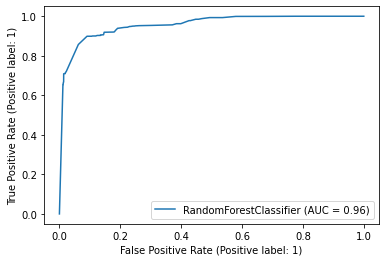

In [49]:
plot_roc_curve(rf, X_train_res, y_train_res)
plt.show()

In [50]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})

In [51]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.876627
13,category_kids_pets,0.028953
8,category_gas_transport,0.023618
12,category_home,0.013925
18,category_shopping_pos,0.011293
19,category_travel,0.010896
10,category_grocery_pos,0.010110
15,category_misc_pos,0.008930
7,category_food_dining,0.004284
17,category_shopping_net,0.003880


In [52]:
y_train_pred = rf.predict(X_train_res)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90   1289169
           1       0.89      0.90      0.90   1288749

    accuracy                           0.90   2577918
   macro avg       0.90      0.90      0.90   2577918
weighted avg       0.90      0.90      0.90   2577918



Predicting on test set

In [54]:
y_test_pred = rf.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [55]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.03      0.92      0.06      2145

    accuracy                           0.89    555719
   macro avg       0.52      0.91      0.50    555719
weighted avg       1.00      0.89      0.94    555719



Testing model on original data without oversampling

In [56]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1289169
           1       0.05      0.93      0.09      7506

    accuracy                           0.89   1296675
   macro avg       0.52      0.91      0.52   1296675
weighted avg       0.99      0.89      0.94   1296675

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.03      0.92      0.06      2145

    accuracy                           0.89    555719
   macro avg       0.52      0.91      0.50    555719
weighted avg       1.00      0.89      0.94    555719



In [57]:
df_train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
dtype: int64

In [58]:
df_train.shape

(1296675, 23)

In [59]:
# Subset of df_train

df_train_merge = df_train[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_train_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [60]:
# Creating dataframe of y_train_pred

df_train_pred = pd.DataFrame(y_train_pred)
df_train_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [61]:
# Merging the two dataframes

df_train_final = pd.concat([df_train_merge, df_train_pred],axis=1)
df_train_final.head()
     

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [62]:
# Renaming column

df_train_final= df_train_final.rename(columns={ 0 : 'is_fraud_pred'})
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [63]:
df_train_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    1289169
1       7506
Name: is_fraud, dtype: int64

In [64]:
df_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    1151366
1     145309
Name: is_fraud_pred, dtype: int64

In [65]:
# Subset of df_test

df_test_merge = df_test[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_test_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [66]:
# Creating dataframe of y_test_pred

df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [67]:
# Merging the two dataframes

df_test_final = pd.concat([df_test_merge, df_test_pred],axis=1)
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [68]:
# Renaming column

df_test_final= df_test_final.rename(columns={ 0 : 'is_fraud_pred'})
df_test_final.head()
     

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [69]:
df_test_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    553574
1      2145
Name: is_fraud, dtype: int64

In [70]:
df_test_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    494455
1     61264
Name: is_fraud_pred, dtype: int64

In [71]:
# Merging train and test dataset for cost benefit analysis

df_merge_final = pd.concat([df_train_final, df_test_final],axis=0)
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [72]:
df_merge_final.shape

(1852394, 5)

Cost Benefit Analysis

In [73]:
# Creating month and year columns

df_merge_final['month'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).month
df_merge_final['year'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).year
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0,1,2019
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0,1,2019
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0,1,2019
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0,1,2019
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0,1,2019


In [74]:
# Group by variable creation

g = df_merge_final.groupby(["year","month"])

In [75]:
# Number of transactions per month

g.trans_num.count()

year  month
2019  1         52525
      2         49866
      3         70939
      4         68078
      5         72532
      6         86064
      7         86596
      8         87359
      9         70652
      10        68758
      11        70421
      12       141060
2020  1         52202
      2         47791
      3         72850
      4         66892
      5         74343
      6         87805
      7         85848
      8         88759
      9         69533
      10        69348
      11        72635
      12       139538
Name: trans_num, dtype: int64

In [76]:
# Average number of transactions per month

df_merge_final.trans_num.count()/24

77183.08333333333

In [77]:
# Average Number of fraudulent transactions per month

df_merge_final[df_merge_final['is_fraud']==1].trans_num.count()/24

402.125

In [78]:
# Average amount per fraud transaction

df_merge_final[df_merge_final['is_fraud']==1].amt.mean()

530.6614122888789

In [79]:
# Average number of transactions per month detected as fraud by the model

df_merge_final[df_merge_final['is_fraud_pred']==1].trans_num.count()/24

8607.208333333334

In [80]:
# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_frauds = df_merge_final.loc[(df_merge_final.is_fraud_pred==0) & (df_merge_final.is_fraud==1)]
Undetected_frauds.trans_num.count()/24

27.125